In [7]:
import cv2
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
import mpl_toolkits.axes_grid1 as axes_grid1
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, HTML
display(HTML("<style>div.output_scroll { height: 84em; }</style>"))


In [8]:
def recursiveCanny(img):
    M, N = img.shape
    m = M//2
    n = N//2
    
    q1 = img[0:m, 0:n]
    q2 = img[m:M, 0:n]
    q3 = img[0:m, n:N]
    q4 = img[m:M, n:N]
    
    
    
    if(m<256 and n<256):
        a =  cv2.Canny(q1, 100, 100)
        b =  cv2.Canny(q2, 100, 100)
        c =  cv2.Canny(q3, 100, 100)
        d =  cv2.Canny(q4, 100, 100)
        top = np.concatenate((a, c), axis=1)
        bottom = np.concatenate((b, d), axis=1)
        final = np.concatenate((top, bottom), axis=0)
        return final
    else: 
        a = recursiveCanny(q1)
        b = recursiveCanny(q2)
        c = recursiveCanny(q3)
        d = recursiveCanny(q4)
        top = np.concatenate((a, c), axis=1)
        bottom = np.concatenate((b, d), axis=1)
        final = np.concatenate((top, bottom), axis=0)
        return final
        
    
    
    

<class 'numpy.ndarray'>
(3456, 4608)


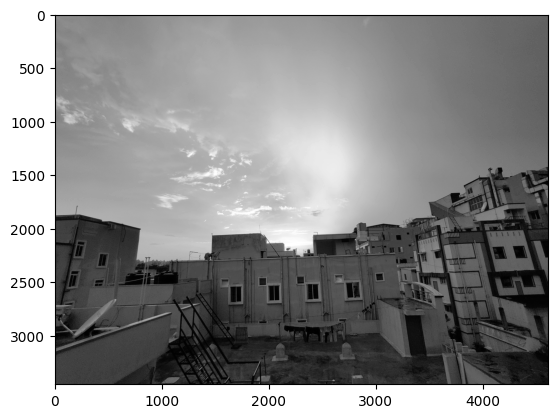

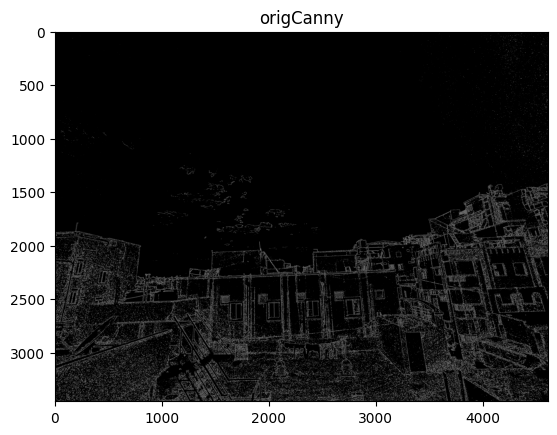

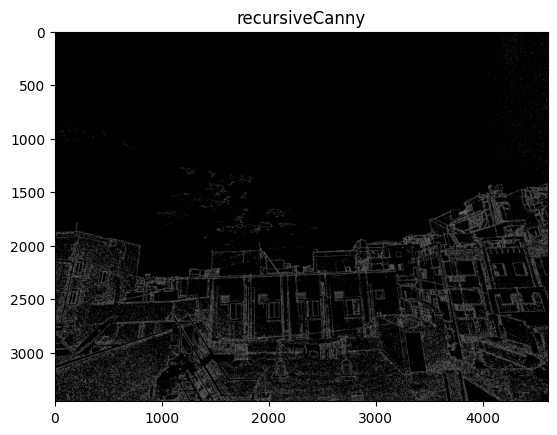

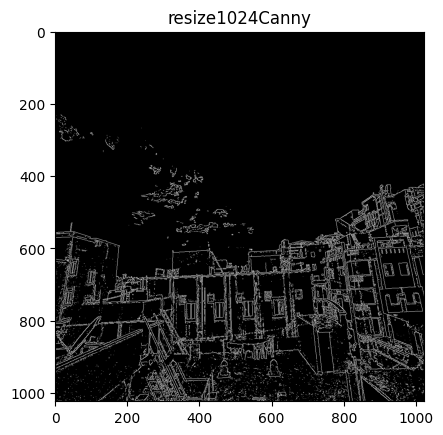

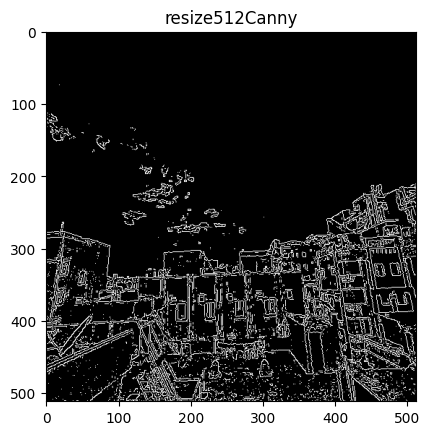

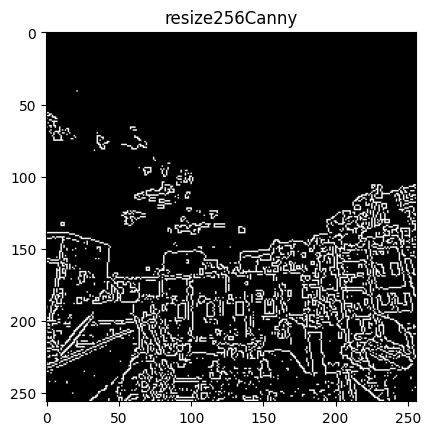

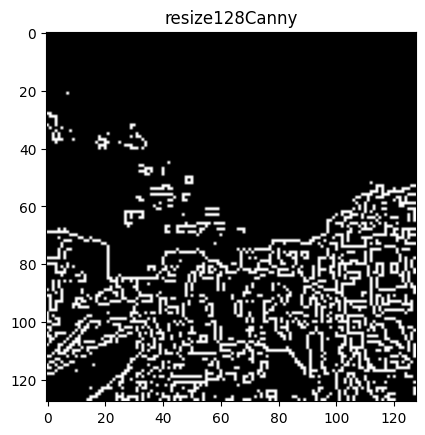

In [9]:
path = "Scale.jpg"
img = cv2.imread("Images/"+path, cv2.IMREAD_GRAYSCALE)
print(type(img))
print(img.shape)
plt.imshow(img, cmap='gray')
plt.show()
origCanny =  cv2.Canny(img, 100, 100)
recursiveCanny = recursiveCanny(img)
img1024 = cv2.resize(img, (1024 , 1024))
resize1024Canny =  cv2.Canny(img1024, 100, 100)
img512 = cv2.resize(img, (512 ,512))
resize512Canny =  cv2.Canny(img512, 100, 100)
img256 = cv2.resize(img, (256 ,256))
resize256Canny =  cv2.Canny(img256, 100, 100)
img128 = cv2.resize(img, (128 ,128))
resize128Canny =  cv2.Canny(img128, 100, 100)
titles = ["origCanny", "recursiveCanny", "resize1024Canny", "resize512Canny", "resize256Canny", "resize128Canny"]
images = [origCanny, recursiveCanny, resize1024Canny, resize512Canny, resize256Canny, resize128Canny]



fig = plt.figure()
i = 0

for img in images:
    plt.imshow(img, cmap='gray')
    plt.title(titles[i])
    plt.show()
    i+=1
    


    
